# Assignment 1

## A bit of info before you start.


> ***First and foremost, dont use AI to code. Use it to understand and then write code yourself. Use AI to verify if the code you wrote it correct, that will help you learn far far more.***

> ***Implement Stuff from sratch. Use cv2 functions only when numpy implementation can be extremely tedious.***



You will need to use your own image for this assignment, which you need to import into here.
If you cant fetch your image from any APIs that dont need credentials, then :
To preserve an image in Google Colab without a continuous runtime or using Google Drive, you can use base64 string encoding of images ( its really simple )

First, begin by normally uploading the image into the contents folders as you normally do in colab or fetch it using Drive or any API.

To get the base64 string :
```
import base64
with open("your_image.jpg", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())
```

Note that the base64 string is a very long string, click on the three dot icon to the left of the current code cell and click on <code> Copy Cell Output </code> to easily copy it to your clipboard.

Then, to embed the string into your Jupyter Notebook :
```
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = "iVBORw0K..."  # long base64 string

img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")
```
The string is really long so, use a multiline string in python ( syntax : """ """ )

Otherwise, you can also choose to use any API ( try researching on https://picsum.photos/ )

## Part A

### Load your image

1. Display it in RGB

2. Convert to grayscale ( use NumPy to calculate aggregates using the weighted sum formula )

3. Use the cvtColor function to do the same and compare results

3. Print the array shapes of both the RGB and grayscale images

4. Print a few pixel values of both

( Do you notice the difference that number of channels created on the array shape ?? )

Saved image to: /content/assignment_image.png
Image shape (H,W,C): (128, 128, 3)


(np.float64(-0.5), np.float64(127.5), np.float64(127.5), np.float64(-0.5))

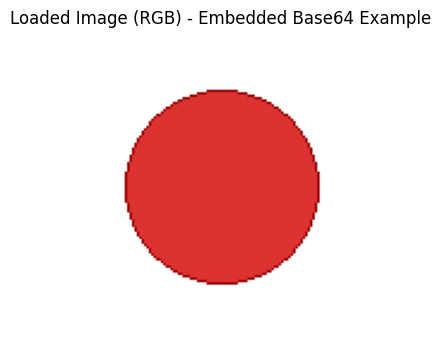

In [2]:
# CELL 1: Loading image from embedded Base64
import io, base64
from PIL import Image
import numpy as np
import cv2
import matplotlib.pyplot as plt


# BASE64 IMAGE STRING (embedded example)

base64_image = """iVBORw0KGgoAAAANSUhEUgAAAIAAAACACAIAAABMXPacAAACkklEQVR4nO3dwW3cMBBAUSlwRVuEe3FF7sVFbEvKgYCgYGNgbczMH3L/O+WQAAa/hooNL7kfx7GJ84f+Al6dAWAGgBkAZgCYAWAGgBkAZgCYAWAGgBkAZgCYAWAGgBkAZgCYAWAGgBkAZgCYAWAGgL3RX8DPfO77M3/tY55fdpogwHXR32+3n/6T5jH2tr8Zdy7ik4v+na/7ffyhZ4l2AaLW/VHPEo0CjKUPX/dHo0STDC0ClC39VZMMfIDPfS9e+quv+51tQAZAHvxH7ChgAdgH/xE1Csx3wt1Wf9u299vtye/yYlVPQJNt5zv121FpgIYP/n9Vbkd1W9Asq7/VbkdFASZa/aGsgT+OhlUEmO7xH2qGID3ApKs/FDTIDTD16g/ZDXwHwBIDLPD4D6lDkBVgmdUf8hq4BcFSAiz2+A9JQ+AEwOIDLPn4DxlD4ATADAALDrDw/jOE70JOAMwAsMgAy+8/Q+wu5ATADAAzACwswIu8AIbA14ATADMAzAAwA8AMADMAzAAwA8AMADMAzAAwA8DCAnwcx3kYw/ICP0TmBMAMADMALDLAi7wGYj9F7ATADAALDrD8LhR+ioETADMALD7AwrtQxikqTgAsJcCSQ5B0iJATAMsKsNgQ5J2hlTgByzRIPcHMLQiWG2CBIcg+wC99AqZuUHB8YsUWNGmDmsMrfQfAigJMNwRlZ7fWTcBEDSpPzvXs6H8sfnb0qecn+pAT7JmXcMPtiLo/wBs0XvUGjZN3yHiLEqlFgMF7xFrwJr0uvEuyi1/cpnr9P27PdT9NEOBqvfuEJwuwHn8cDTMAzAAwA8AMADMAzAAwA8AMADMAzAAwA8AMADMAzAAwA8AMADMAzAAwA8AMADMA7C/tTFIDWWrwoAAAAABJRU5ErkJggg=="""

# Decode base64 to bytes, open with PIL
img_bytes = base64.b64decode(base64_image)
img_pil = Image.open(io.BytesIO(img_bytes)).convert("RGB")

# Convert to numpy (RGB order)
img_rgb = np.array(img_pil)

# Save a copy to /content for convenience
out_path = "/content/assignment_image.png"
img_pil.save(out_path, format="PNG")
print("Saved image to:", out_path)
print("Image shape (H,W,C):", img_rgb.shape)

# Show image (RGB)
plt.figure(figsize=(4,4))
plt.imshow(img_rgb)
plt.title("Loaded Image (RGB) - Embedded Base64 Example")
plt.axis("off")

RGB shape: (128, 128, 3)
Manual grayscale shape: (128, 128)
cv2 grayscale shape     : (128, 128)

Sample RGB pixels and grayscale values:
Pixel (0,0) - RGB: [255 255 255]  -> gray_manual: 255  -> gray_cv: 255
Pixel (10,10) - RGB: [255 255 255]  -> gray_manual: 255  -> gray_cv: 255
Pixel (30,40) - RGB: [255 255 255]  -> gray_manual: 255  -> gray_cv: 255


(np.float64(-0.5), np.float64(127.5), np.float64(127.5), np.float64(-0.5))

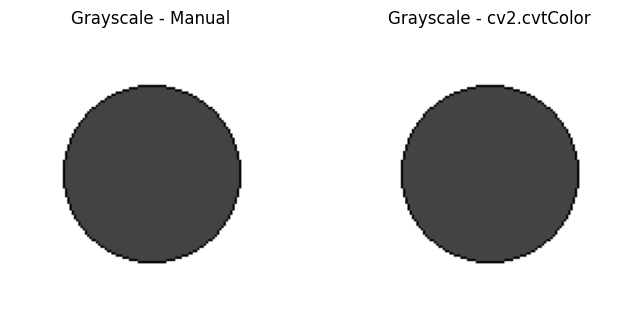

In [3]:
# CELL 2: Part A - RGB -> Grayscale manual and cvtColor, sample pixels
import numpy as np, cv2, matplotlib.pyplot as plt
print("RGB shape:", img_rgb.shape)   # (H, W, 3)
h, w, c = img_rgb.shape

# Manual grayscale weighted sum
img_rgb_f = img_rgb.astype(np.float32)
gray_manual = (0.299 * img_rgb_f[:,:,0] + 0.587 * img_rgb_f[:,:,1] + 0.114 * img_rgb_f[:,:,2])
gray_manual_u8 = np.clip(gray_manual, 0, 255).astype(np.uint8)

# cv2 conversion
gray_cv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)

print("Manual grayscale shape:", gray_manual_u8.shape)
print("cv2 grayscale shape     :", gray_cv.shape)

coords = [(0,0), (10,10), (30, 40)]
print("\nSample RGB pixels and grayscale values:")
for (r,c) in coords:
    if r < h and c < w:
        print(f"Pixel ({r},{c}) - RGB:", img_rgb[r,c],
              " -> gray_manual:", int(gray_manual_u8[r,c]),
              " -> gray_cv:", int(gray_cv[r,c]))
    else:
        print(f"Pixel ({r},{c}) out of bounds for this image size")

plt.figure(figsize=(8,4))
plt.subplot(1,2,1); plt.imshow(gray_manual_u8, cmap='gray'); plt.title('Grayscale - Manual'); plt.axis('off')
plt.subplot(1,2,2); plt.imshow(gray_cv, cmap='gray'); plt.title('Grayscale - cv2.cvtColor'); plt.axis('off')

## Part B
### B1. Compute the FFT of the grayscale image ( use NumPy )
Steps:
1. <code>np.fft.fft2</code>
2. <code>np.fft.fftshift</code>
3. Store as <code>fshift</code>

### B2. Compute magnitude, phase and display Magnitude Spectrum

(np.float64(-0.5), np.float64(127.5), np.float64(127.5), np.float64(-0.5))

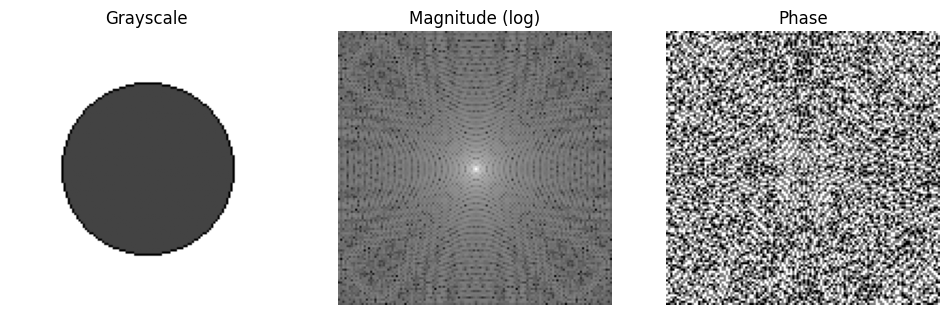

In [4]:
# CELL 3: Part B - FFT, shift, magnitude & phase
import numpy as np, matplotlib.pyplot as plt
gray = gray_manual_u8.astype(np.float32)

# FFT and shift
f = np.fft.fft2(gray)
fshift = np.fft.fftshift(f)

# Magnitude and phase
magnitude = np.abs(fshift)
phase = np.angle(fshift)
magnitude_log = 20 * np.log(magnitude + 1)

plt.figure(figsize=(12,4))
plt.subplot(1,3,1); plt.imshow(gray, cmap='gray'); plt.title('Grayscale'); plt.axis('off')
plt.subplot(1,3,2); plt.imshow(magnitude_log, cmap='gray'); plt.title('Magnitude (log)'); plt.axis('off')
plt.subplot(1,3,3); plt.imshow(phase, cmap='gray'); plt.title('Phase'); plt.axis('off')

## Part C
### C1. Create 3 LPF masks

Radii of filter: 10, 30, 80 (or image-size dependent, mention if you change)

For each:

1. Create a mask

2. Apply to <code>fshift</code>

3. Reconstruct using <code>ifftshift + ifft2</code>

4. Show blur levels increasing as radius decreases ( think why and write reason in code comment )

### C2. Create HPF mask

1. Apply

2. Reconstruct

### C3. Create a square LPF mask
Keep side of square as 50. The square will be at the center of the filter.
Apply, Recontruct and show the output.

(np.float64(-0.5), np.float64(127.5), np.float64(127.5), np.float64(-0.5))

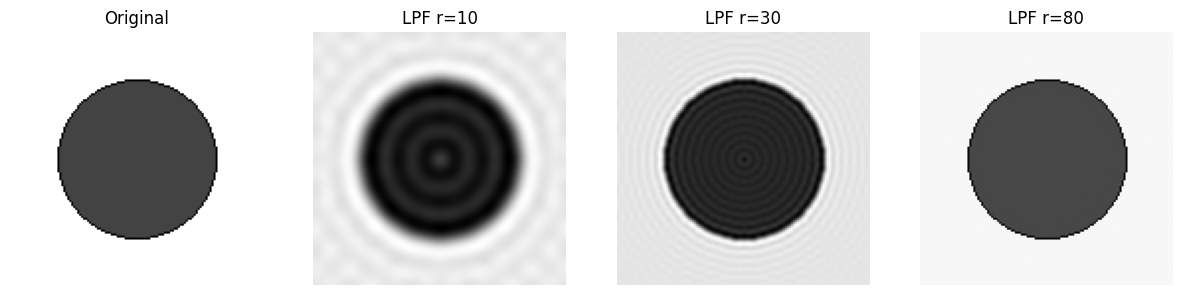

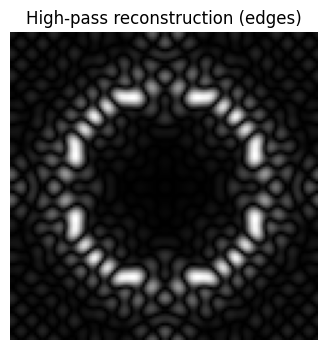

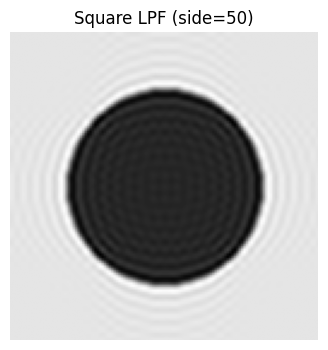

In [5]:
# CELL 4: - LPF and HPF masks (circular radii [10,30,80]) + square LPF
import cv2, numpy as np, matplotlib.pyplot as plt
rows, cols = gray.shape
crow, ccol = rows//2, cols//2

def make_circle_mask(rows, cols, radius):
    mask = np.zeros((rows, cols), np.uint8)
    cv2.circle(mask, (ccol, crow), radius, 1, -1)
    return mask

radii = [10, 30, 80]
recon_lpf = []
for r in radii:
    mask = make_circle_mask(rows, cols, r)
    f_lpf = fshift * mask
    img_back = np.fft.ifft2(np.fft.ifftshift(f_lpf))
    img_back = np.abs(img_back)
    recon_lpf.append((r, img_back))

plt.figure(figsize=(15,4))
plt.subplot(1, len(recon_lpf)+1, 1)
plt.imshow(gray, cmap='gray'); plt.title('Original'); plt.axis('off')
for i,(r,imgb) in enumerate(recon_lpf, start=2):
    plt.subplot(1, len(recon_lpf)+1, i)
    plt.imshow(imgb, cmap='gray'); plt.title(f'LPF r={r}'); plt.axis('off')

# High-pass (using largest radius)
mask_lpf_big = make_circle_mask(rows, cols, radius=80)
mask_hpf = 1 - mask_lpf_big
f_hpf = fshift * mask_hpf
img_back_hpf = np.fft.ifft2(np.fft.ifftshift(f_hpf))
img_back_hpf = np.abs(img_back_hpf)

plt.figure(figsize=(6,4))
plt.imshow(img_back_hpf, cmap='gray'); plt.title('High-pass reconstruction (edges)'); plt.axis('off')

# Square LPF
side = 50
mask_square = np.zeros((rows, cols), np.uint8)
rstart = crow - side//2
cstart = ccol - side//2
mask_square[rstart:rstart+side, cstart:cstart+side] = 1
f_square = fshift * mask_square
img_back_square = np.fft.ifft2(np.fft.ifftshift(f_square))
img_back_square = np.abs(img_back_square)

plt.figure(figsize=(6,4))
plt.imshow(img_back_square, cmap='gray'); plt.title(f'Square LPF (side={side})'); plt.axis('off')

## Part D

###D1. Phase-only reconstruction

Use: <code>phase_only = fshift / np.abs(fshift)</code>

1. Reconstruct and display.
2. Also in code comments, mention the differnce between this code line and the one in the lecture : <code>np.angle(f_shift)</code>
3. Try recontruction from <code>np.angle(f_shift)</code> once and explain your output in code comments.



###D2. Magnitude-only reconstruction

Use: <code>mag_only = np.abs(fshift)</code>

1. Reconstruct and display.
2. Take a guess for the role of logarithm in Magnitude Spectrum. Why does this look different than what Magnitude Spectrum looked like ? Mention in code comments again.

(np.float64(-0.5), np.float64(127.5), np.float64(127.5), np.float64(-0.5))

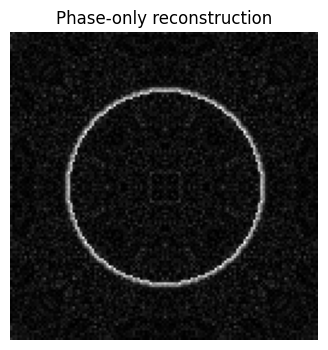

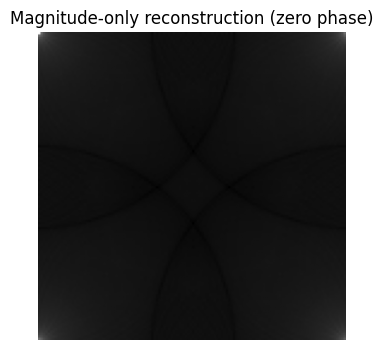

In [8]:
# CELL 5:- Phase-only and Magnitude-only reconstructions
import numpy as np, matplotlib.pyplot as plt
eps = 1e-9
phase_only = fshift / (np.abs(fshift) + eps)
img_phase_only = np.fft.ifft2(np.fft.ifftshift(phase_only))
img_phase_only = np.abs(img_phase_only)

plt.figure(figsize=(6,4))
plt.imshow(img_phase_only, cmap='gray'); plt.title('Phase-only reconstruction'); plt.axis('off')

# Magnitude-only (zero phase)
mag_only = np.abs(fshift)
mag_only_spec = mag_only * np.exp(1j * 0.0)
img_mag_only = np.fft.ifft2(np.fft.ifftshift(mag_only_spec))
img_mag_only = np.abs(img_mag_only)

plt.figure(figsize=(6,4))
plt.imshow(img_mag_only, cmap='gray'); plt.title('Magnitude-only reconstruction (zero phase)'); plt.axis('off')

## Bonus - Part E

Load another image as you did before. Then swap magnitude and phase between them. In other words, for both images, find the magnitudes and phases. Combine magnitude of image 1 with phase of image 2. Also combine magnitude of 2 with phase of 1. Then reconstruct and display the resultant images.

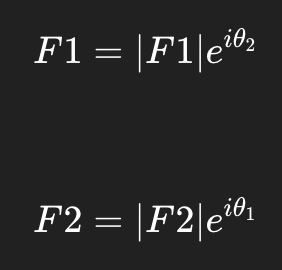

Do you notice how phase describes structure and magnitude describes texture of image ? Mention at last in code comments.


(np.float64(-0.5), np.float64(127.5), np.float64(127.5), np.float64(-0.5))

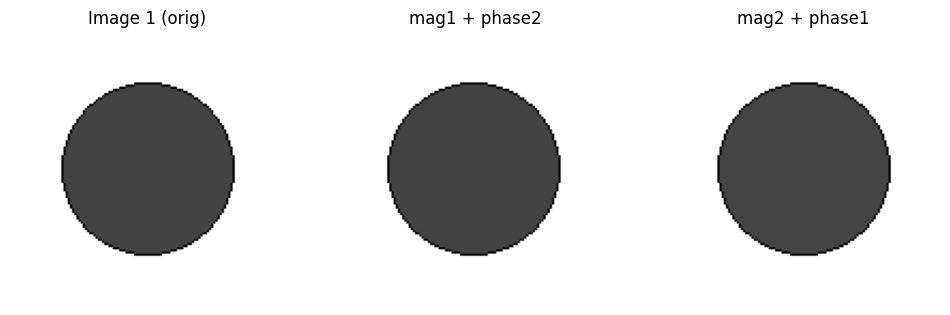

In [7]:
# CELL 6:- Swaping magnitude and phase between two images (bonus)
import numpy as np, matplotlib.pyplot as plt
# Creating second image (flipped) for demonstration
img_rgb2 = np.fliplr(img_rgb)
gray2 = (0.299 * img_rgb2[:,:,0] + 0.587 * img_rgb2[:,:,1] + 0.114 * img_rgb2[:,:,2]).astype(np.float32)

f1 = np.fft.fft2(gray)
f2 = np.fft.fft2(gray2)
f1s = np.fft.fftshift(f1); f2s = np.fft.fftshift(f2)

mag1, ph1 = np.abs(f1s), np.angle(f1s)
mag2, ph2 = np.abs(f2s), np.angle(f2s)

spec_a = mag1 * np.exp(1j * ph2)
spec_b = mag2 * np.exp(1j * ph1)

img_a = np.fft.ifft2(np.fft.ifftshift(spec_a)); img_a = np.abs(img_a)
img_b = np.fft.ifft2(np.fft.ifftshift(spec_b)); img_b = np.abs(img_b)

plt.figure(figsize=(12,4))
plt.subplot(1,3,1); plt.imshow(gray, cmap='gray'); plt.title('Image 1 (orig)'); plt.axis('off')
plt.subplot(1,3,2); plt.imshow(img_a, cmap='gray'); plt.title('mag1 + phase2'); plt.axis('off')
plt.subplot(1,3,3); plt.imshow(img_b, cmap='gray'); plt.title('mag2 + phase1'); plt.axis('off')